In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel, wilcoxon, probplot

# Import Raw Dataset

In [2]:
# Use your own csv data file.
# If with missing scores, run the Impute notebook and use the new csv

df_Scores = pd.read_csv('Datasets/ArcaneSample.csv', index_col=0)
df_Scores = df_Scores.fillna(0)

df_Scores['Difference'] = df_Scores['Posttest'] - df_Scores['Pretest']  
df_Scores

,Sex,Age,Grade,IsSecondTime,Pretest,Posttest,Difference
Surname,,,,,,,
Apresto,F,10.0,4.0,0.0,0.0,0.0,0.0
Bargo,F,10.0,5.0,0.0,10.0,0.0,-10.0
Callos,F,11.0,6.0,0.0,0.0,0.0,0.0
Capillano,F,11.0,6.0,0.0,4.0,0.0,-4.0
Galan,F,12.0,6.0,1.0,2.0,2.0,0.0
Gonzaga,M,11.0,6.0,1.0,0.0,0.0,0.0
Helig,F,8.0,4.0,0.0,0.0,0.0,0.0
Hermano,F,11.0,6.0,1.0,4.0,0.0,-4.0
Loyola,F,9.0,5.0,0.0,4.0,1.0,-3.0


# Filter (Optional)
Create subsets of the dataframe to test for.

i.e.
* Grade level
* Sex
* Age

In [3]:
df_Grade4 = df_Scores[df_Scores['Grade'] == 4].copy()
df_Grade5 = df_Scores[df_Scores['Grade'] == 5].copy()
df_Grade6 = df_Scores[df_Scores['Grade'] == 6].copy()

# Set df_Score to the Data you will use
i.e. `df_Scores = df_Grade4`

In [4]:
df_Scores = df_Grade4
df_Scores

,Sex,Age,Grade,IsSecondTime,Pretest,Posttest,Difference
Surname,,,,,,,
Apresto,F,10.0,4.0,0.0,0.0,0.0,0.0
Helig,F,8.0,4.0,0.0,0.0,0.0,0.0
Malabriga,F,11.0,4.0,0.0,6.0,0.0,-6.0
Parame,M,10.0,4.0,0.0,3.0,0.0,-3.0


Drop the additional filter features

In [6]:
df_Scores = df_Scores[['Pretest',	'Posttest',	'Difference']] 
df_Scores

,Pretest,Posttest,Difference
Surname,,,
Apresto,0.0,0.0,0.0
Helig,0.0,0.0,0.0
Malabriga,6.0,0.0,-6.0
Parame,3.0,0.0,-3.0


# Pipeline

1. Determine Normality of Delta Score between Pretest and Postest
    1. If normal, use `paired t-test` to measure significant difference from mean.
    2. Else, use `wilcoxon` to measure significant difference from median.
2. Evaluate p_value
    1. Significant change if p < threshold (0.05)
3. Evaluate effect
    1. If normal, use `Cohen's D`.
    2. Else, use `Rank-biserial correlation`. 

In [7]:
df_Scores.describe()

,Pretest,Posttest,Difference
count,4.000000,4.0,4.000000
mean,2.250000,0.0,-2.250000
std,2.872281,0.0,2.872281
min,0.000000,0.0,-6.000000
25%,0.000000,0.0,-3.750000
50%,1.500000,0.0,-1.500000
75%,3.750000,0.0,0.000000
max,6.000000,0.0,0.000000


# Inspect Normality Distribution

## A. Graphical Approach

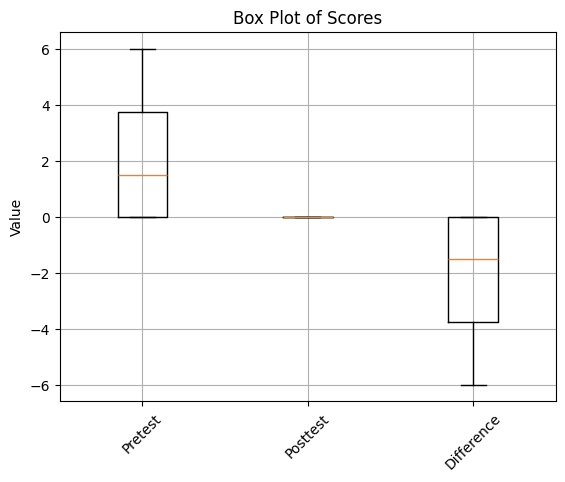

In [8]:
plt.boxplot(df_Scores)
plt.title("Box Plot of Scores")
plt.xticks(ticks=np.arange(1,df_Scores.columns.size + 1), labels=df_Scores.columns, rotation=45)
plt.ylabel("Value")
plt.grid(True)
plt.savefig('Graphs/Box Plot of Scores.png')
plt.show()

### Distribution Curve
Check for symmetry and center.

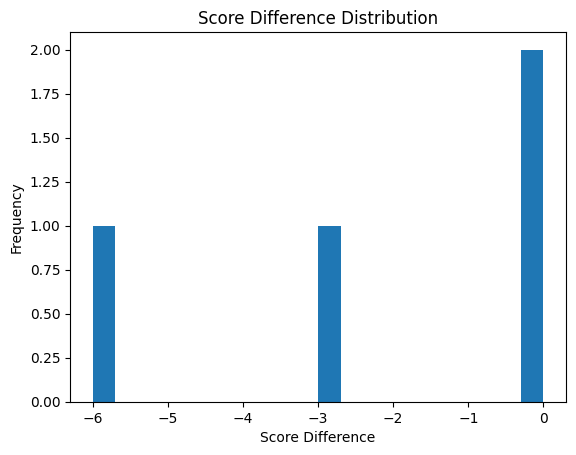

In [9]:
plt.hist(df_Scores['Difference'], bins=20)
plt.title('Score Difference Distribution')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.savefig('Graphs/Hist Score Distribution.png')
plt.show()

### Q-Q Plot
Check if values land precisely on the line.

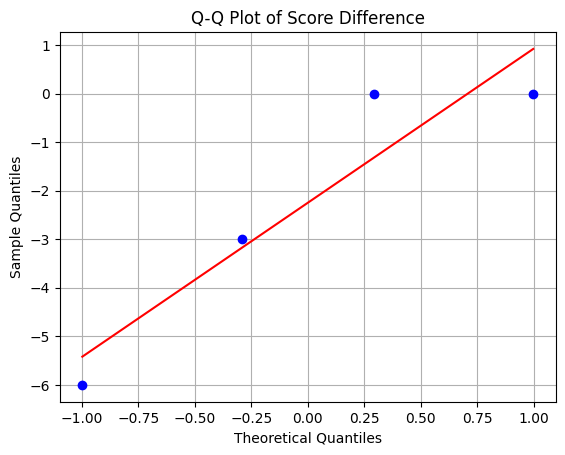

In [10]:
probplot(df_Scores.Difference, dist="norm", plot=plt)
plt.title("Q-Q Plot of Score Difference")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.savefig('Graphs/QQ Plot of Score Difference.png')
plt.show()

## B. Statistical Approach
### Shapiro for n <= 20

Null Hypothesis is that it's Normal

In [11]:
shapiro_result = shapiro(df_Scores.Difference)

print(f't: {shapiro_result.statistic:.4f}')
print(f'p: {shapiro_result.pvalue:.4f}')

t: 0.8634
p: 0.2725


## Overwrite Shapiro
If there's too few datapoints, assume already that it's Non-Parametric.

Set to less than 10 datapoints

In [12]:
IsForceNonParam = False
if df_Scores.shape[0] < 10:
    IsForceNonParam = True
    print(f"Sample size is too small {df_Scores.shape[0]}. Using Non Param eval")

Sample size is too small 4. Using Non Param eval


# Evaluate Significant Difference and Effect

<table>
    <tr>
        <td></td>
        <td><b>T-Test</b></td>
        <td><b>Wilcoxon</b></td>
    </tr>
    <tr>
        <td><b>Sample size</b></td>
        <td></td>
        <td>N <= 20</td>
    </tr>
    <tr>
        <td><b>Normal Distribution</b></td>
        <td>✅</td>
        <td>❌</td>
    </tr>
    <tr>
        <td><b>Signinifigance</b></td>
        <td>Mean</td>
        <td>Median</td>
    </tr>
    <tr>
        <td><b>Effect Metric</b></td>
        <td>Cohen's D</td>
        <td>Rank-biserial Correlation</td>
    </tr>
</table>

In [13]:
if shapiro_result.pvalue > 0.05 and IsForceNonParam == False:
    print(f'Using Paired T-Test with Normal Data {shapiro_result.pvalue:.4f}')
    result = ttest_rel(df_Scores.Pretest, df_Scores.Posttest)

    cohens_d = df_Scores.Difference.mean() / df_Scores.Difference.std()
    print(f'Cohen\'s D: {cohens_d:.4f}')

else:
    print(f'Using Wilcoxon with Non-Paremetric Data {shapiro_result.pvalue:.4f}%')
    result = wilcoxon(df_Scores.Difference)

    W = result.statistic
    n = df_Scores.shape[0]
    rb_corr = 1 - (2 * W) / (n * (n + 1) / 2)
    
    # rb_corr = result.zstatistic / np.sqrt(df_Scores.Difference.size)
    print(f'Rank-biserial correlation: {rb_corr:.4f}')
    
    
print(f'Test statistic: {result.statistic:.4f}')
print(f'p: {result.pvalue:.4f}')

Using Wilcoxon with Non-Paremetric Data 0.2725%
Rank-biserial correlation: 1.0000
Test statistic: 0.0000
p: 0.5000


### Cohen's D Effectiveness
![Cohen's D](https://www.simplypsychology.org/wp-content/uploads/cohen-d.jpg)